**Maya Kalenak**

CS 251: Data Analysis and Visualization

Fall 2024

# Project 6 | Supervised Learning

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Naive Bayes Classifier

After finishing your email preprocessing pipeline, implement the one other supervised learning algorithm we we will use to classify email, **Naive Bayes**.

### 4a. Implement Naive Bayes

In `naive_bayes.py`, implement the following methods:
- Constructor
- get methods
- `train(data, y)`: Train the Naive Bayes classifier so that it records the "statistics" of the training set: class priors (i.e. how likely an email is in the training set to be spam or ham?) and the class likelihoods (the probability of a word appearing in each class — spam or ham).
- `predict(data)`: Combine the class likelihoods and priors to compute the posterior distribution. The predicted class for a test sample is the class that yields the highest posterior probability.


#### Bayes rule ingredients: Priors and likelihood (`train`)

To compute class predictions (probability that a test example belong to either spam or ham classes), we need to evaluate **Bayes Rule**. This means computing the priors and likelihoods based on the training data.

**Prior:** $$P_c = \frac{N_c}{N}$$ where $P_c$ is the prior for class $c$ (spam or ham), $N_c$ is the number of training samples that belong to class $c$ and $N$ is the total number of training samples.

**Likelihood:** $$L_{c,w} = \frac{T_{c,w} + 1}{T_{c} + M}$$ where
- $L_{c,w}$ is the likelihood that word $w$ belongs to class $c$ (*i.e. what we are solving for*)
- $T_{c,w}$ is the total count of **word $w$** in emails that are only in class $c$ (*either spam or ham*)
- $T_{c}$ is the total count of **all words** that appear in emails of the class $c$ (*total number of words in all spam emails or total number of words in all ham emails*)
- $M$ is the number of features (*number of top words*).

#### Bayes rule ingredients: Posterior (`predict`)

To make predictions, we now combine the prior and likelihood to get the posterior:

**Log Posterior:** $$Log(\text{Post}_{i, c}) = Log(P_c) + \sum_{j \in J_i}x_{i,j}Log(L_{c,j})$$

 where
- $\text{Post}_{i,c}$ is the posterior for class $c$ for test sample $i$(*i.e. evidence that email $i$ is spam or ham*). We solve for its logarithm.
- $Log(P_c)$ is the logarithm of the prior for class $c$.
- $x_{i,j}$ is the number of times the jth word appears in the ith email.
- $Log(L_{c,j})$: is the log-likelihood of the jth word in class $c$.

In [52]:
from naive_bayes import NaiveBayes
from classifier import Classifier

#### Test `train`

###### Class priors and likelihoods

The following test should be used only if storing the class priors and likelihoods directly.

In [53]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your class priors are: {nbc.get_priors()}\nand should be          [0.28 0.22 0.32 0.18].')
print(f'Your class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your likelihoods are:\n{nbc.get_likelihoods()}')

print('and should be')
print('''[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]''')

Your class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be          [0.28 0.22 0.32 0.18].
Your class likelihoods shape is (4, 6) and should be (4, 6).
Your likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[0.15997 0.15091 0.2079  0.19106 0.14184 0.14832]
 [0.11859 0.16821 0.17914 0.16905 0.18082 0.18419]
 [0.16884 0.17318 0.14495 0.14332 0.18784 0.18187]
 [0.16126 0.17011 0.15831 0.13963 0.18977 0.18092]]


###### Log of class priors and likelihoods

This test should be used only if storing the log of the class priors and likelihoods.

In [54]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.randint(low=0, high=20, size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your log class priors are: {nbc.get_priors()}\nand should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].')
print(f'Your log class likelihoods shape is {nbc.get_likelihoods().shape} and should be (4, 6).')
print(f'Your log likelihoods are:\n{nbc.get_likelihoods()}')


print('and should be')
print('''[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]''')

Your log class priors are: [-1.27297 -1.51413 -1.13943 -1.7148 ]
and should be              [-1.27297 -1.51413 -1.13943 -1.7148 ].
Your log class likelihoods shape is (4, 6) and should be (4, 6).
Your log likelihoods are:
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]
and should be
[[-1.83274 -1.89109 -1.57069 -1.65516 -1.95306 -1.90841]
 [-2.13211 -1.78255 -1.71958 -1.77756 -1.71023 -1.6918 ]
 [-1.77881 -1.75342 -1.93136 -1.94266 -1.67217 -1.70448]
 [-1.82475 -1.77132 -1.84321 -1.96879 -1.66192 -1.70968]]


#### Test `predict`

In [55]:
num_test_classes = 4
np.random.seed(0)
data_train = np.random.randint(low=0, high=15, size=(100, 10))
data_test = np.random.randint(low=0, high=15, size=(15, 10))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_train, y_test)
test_y_pred = nbc.predict(data_test)

print(f'Your predicted classes are\n{test_y_pred}\nand should be\n[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]')

Your predicted classes are
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]
and should be
[2 0 0 3 0 3 2 1 2 3 1 0 0 1 0]]


### 4b. Spam filtering

Use your Naive Bayes classifier to predict whether emails in the Enron email dataset are spam! Start by running the following code that uses `np.load` to load in the train/test split that you created last week.


In [56]:
x_train = np.load('data/email_train_x.npy')
y_train = np.load('data/email_train_y.npy')
inds_train = np.load('data/email_train_inds.npy')
x_test = np.load('data/email_test_x.npy')
y_test = np.load('data/email_test_y.npy')
inds_test = np.load('data/email_test_inds.npy')

### 4c. Questions

**Question 7:** What accuracy do you get on the test set with Naive Bayes. It should be roughly 89%.

In [57]:
num_test_classes = 4
nb_email = NaiveBayes(num_classes=num_test_classes)
nb_email.train(x_train,y_train)
y_pred = nb_email.predict(x_test)
nb_accuracy = nb_email.accuracy(y=y_test,y_pred=y_pred)
print(nb_accuracy);

0.8954789272030651


/Users/mayakalenak/Desktop/project6/naive_bayes.py:33: RuntimeWarning: divide by zero encountered in log
  return np.log(self.prior)


**Answer 7:** Using Naive Bayes to classify the email data, I got 89.5% accuracy. 

### 4d. Confusion matrix

To get a better sense of the errors that the Naive Bayes classifier makes, implement the `confusion_matrix` method in `Classifer` then create a confusion matrix of the spam classification results. Assign the confusion matrix below to the variable `conf_matrix_nb` and run the code below to help test your confusion matrix.

In [58]:
num_test_classes = 2
conf_matx = Classifier(num_classes=num_test_classes)
conf_matrix_nb = conf_matx.confusion_matrix(y_test, y_pred)
print(conf_matrix_nb)

[[2814.  549.]
 [ 133. 3029.]]


#### Test confusion matrix

In [59]:
print(f'The total number of entries in your confusion matrix is {int(conf_matrix_nb.sum())} and should be {len(y_test)}.')
print(f'The total number of ham entries in your confusion matrix is {int(conf_matrix_nb[0].sum())} and should be {int(np.sum(y_test == 0))}.')
print(f'The total number of spam entries in your confusion matrix is {int(conf_matrix_nb[1].sum())} and should be {int(np.sum(y_test == 1))}.')

The total number of entries in your confusion matrix is 6525 and should be 6525.
The total number of ham entries in your confusion matrix is 3363 and should be 3363.
The total number of spam entries in your confusion matrix is 3162 and should be 3162.


### 4e. Questions

**Question 8:** Interpret the confusion matrix, using the convention that positive detection means spam (*e.g. a false positive means classifying a ham email as spam*). What types of errors are made more frequently by the classifier? What does this mean (*i.e. X (spam/ham) is more likely to be classified than Y (spam/ham) than the other way around*)?

**Answer 8:** There are 549 ham emails that were predicted to be spam and 133 spam emails that were predicted to be ham. There are more errors made in classifying ham emails than ham emails therefore, ham emails are more likely to be misclassified than spam emails. 

## Task 5: Comparison with KNN

In [60]:
from knn import KNN

### 5a. KNN spam email classification accuracy
Run a similar analysis to what you did with Naive Bayes above. When computing accuracy on the test set, you may want to reduce the size of the test set (e.g. to the first 500 emails in the test set).

In [61]:
num_k = 2
knn_classifier = KNN(num_k)
knn_classifier.train(data=x_train,y=y_train) 
y_pred = knn_classifier.predict(x_test,k=num_k)
knn_accuracy = knn_classifier.accuracy(y_test[:500], y_pred[:500])
print(knn_accuracy)

0.922


### 5b. KNN spam email confusion matrix

In the cell below, create a confusion matrix for your KNN classifier results

In [62]:
knn_conf_matrix = knn_classifier.confusion_matrix(y=y_test, y_pred=y_pred)
print(knn_conf_matrix)

[[3187.  176.]
 [ 355. 2807.]]


### 5c. Questions

**Question 9:** What accuracy did you get on the test set (potentially reduced in size)?

**Question 10:** How does the confusion matrix compare to that obtained by Naive Bayes (*If you reduced the test set size, keep that in mind*)?

**Question 11:** What is the primary benefit and downside of KNN that we observe here compared to Naive Bayes?

**Question 12:** When potentially reducing the size of the test set here, why is it important that we shuffled our train and test set?

**Answer 9:** After reducing the test set size to the first 500 emails, I got a 92.2% accueacy using KNN. 

**Answer 10:** There were around more misclassified spam emails using KNN than Naive Bayes and more misclassified ham (non-spam) emails using Naive Bayes than KNN. However this may be skewed since the test size of the dataset used in KNN was reduced. 

**Answer 11:** A downside of KNN is that it takes longer to run than Naive Bayes in this dataset. A benefit of KNN is that it has a higher accuracy than Naive Bayes in this dataset.  

**Answer 12:** When creating the train and test sets, it is important to shuffle the order of the email data, especially with a reduced size, so that the reduced data set is not retrieving the first ham or spam emails in the dataset but instead retrieving a shuffled mix of both spam and ham emails. 

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 0. Classify your own datasets

- Find datasets that you find interesting and run classification on them using your KNN algorithm (and if applicable, Naive Bayes). Analysis the performance of your classifer.

In [63]:
train = pd.read_csv("data/train_sample.csv", delimiter=",", header=1)
test = pd.read_csv("data/test_sample.csv",  delimiter=",", header=1)

train = train.to_numpy()
test = test.to_numpy()

train_y = train[:,-(train.shape[1]-1)]
test_y = test[:,-(train.shape[1]-1)]

train_data = train[:,:-(train.shape[1]-1):]
test_data = test[:,:-(train.shape[1]-1):]

knn_n_classes = 2
knn_analysis = KNN(num_classes=knn_n_classes)
knn_analysis.train(train_data, train_y)

k = 9
predict_y = knn_analysis.predict(test_data,k)
acc_train2 = knn_analysis.accuracy(y=test_y, y_pred=predict_y)
print(f"KNN Accuracy: \n{acc_train2:.2f}")

conf_matrix_knn = knn_analysis.confusion_matrix(test_y,predict_y)
print("KNN Confusion Matrix: \n",conf_matrix_knn)

nb_n_classes = 2
nb_analysis = NaiveBayes(num_classes=nb_n_classes)
conf_matrix = Classifier(num_classes=nb_n_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print(f"\nNaive Bayes Accuracy: \n{nb_accuracy:.2f}")

conf_matrix_nb = conf_matrix.confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix: \n",conf_matrix_nb);

KNN Accuracy: 
1.00
KNN Confusion Matrix: 
 [[999.   0.]
 [  0.   0.]]

Naive Bayes Accuracy: 
0.90
Naive Bayes Confusion Matrix: 
 [[2814.  549.]
 [ 133. 3029.]]


Best KNN Accuracy is with k = 0: 
1.00
KNN Confusion Matrix: 
 [[999.]]


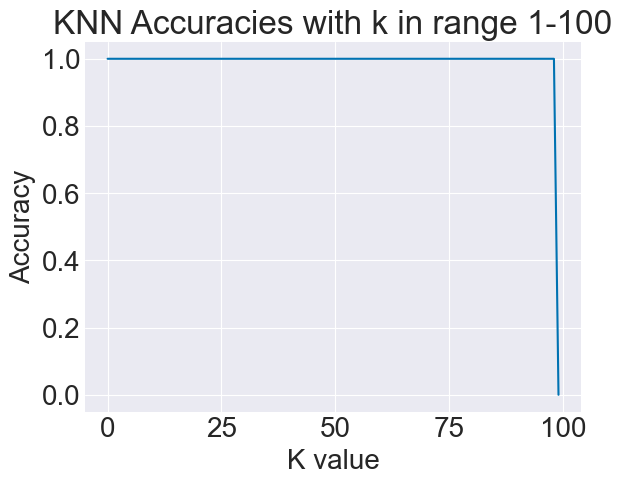

In [64]:
knn_n_classes = 1
knn_analysis = KNN(num_classes=knn_n_classes)

accuracy = np.zeros((100,))

for k in range(99):
    knn_analysis.train(train_data, train_y)
    predict_y = knn_analysis.predict(test_data,k+1)
    acc_knn = knn_analysis.accuracy(y=test_y, y_pred=predict_y)
    accuracy[k] = acc_knn

plt.plot(np.arange(0,100,step=1),accuracy)
plt.title("KNN Accuracies with k in range 1-100")
plt.xlabel("K value")
plt.ylabel("Accuracy")
print(f"Best KNN Accuracy is with k = {np.argmax(accuracy)}: \n{np.max(accuracy):.2f}")

conf_matrix_knn = knn_analysis.confusion_matrix(test_y,predict_y)
print("KNN Confusion Matrix: \n",conf_matrix_knn)

In [65]:
nb_n_classes = 1
nb_analysis = NaiveBayes(num_classes=nb_n_classes)
conf_matrix = Classifier(num_classes=nb_n_classes)

nb_analysis.train(train_data,train_y)
y_pred = nb_analysis.predict(test_data) 
nb_accuracy = nb_analysis.accuracy(y=test_y,y_pred=y_pred)
print(f"Naive Bayes Accuracy: \n{nb_accuracy:.2f}")

conf_matrix_nb = conf_matrix.confusion_matrix(test_y, y_pred)
print("Naive Bayes Confusion Matrix: \n",conf_matrix_nb);

Naive Bayes Accuracy: 
1.00
Naive Bayes Confusion Matrix: 
 [[999.]]


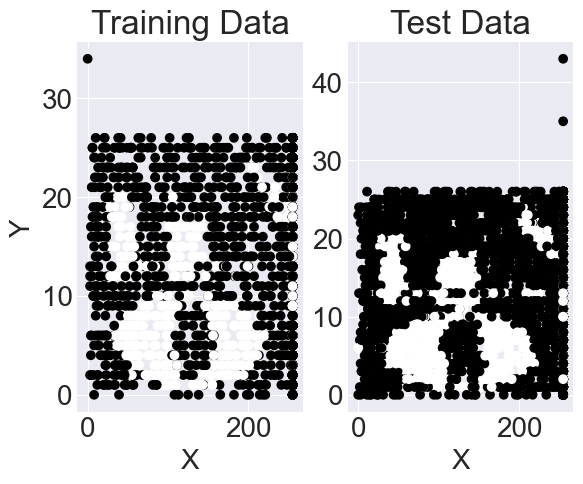

In [66]:
train = pd.read_csv("data/hw2train.csv", delimiter=",", header=1)
test = pd.read_csv("data/hw2test.csv",  delimiter=",", header=1)

train = train.to_numpy()
test = test.to_numpy()

train_y = train[:,2]
test_y = test[:,2]

train_data = train[:,:2]
test_data = test[:,:2]

plt.subplots(1,2)
plt.subplot(1,2,1)
plt.scatter(train_data[:,0],train_data[:,1],c=train_y)
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,2,2)
plt.scatter(test_data[:,0],test_data[:,1],c=test_y)
plt.title("Test Data")
plt.xlabel("X");

Best KNN Accuracy is with k = 10: 
0.84
KNN Confusion Matrix: 
 [[   0.    0.    0.]
 [   0.  218.  949.]
 [   0.  106. 3726.]]


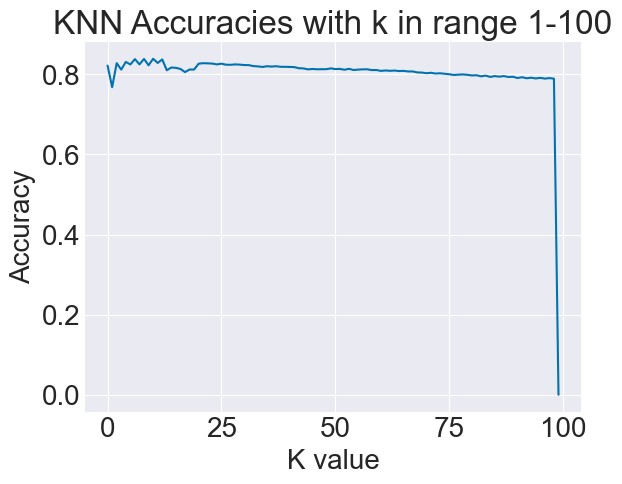

In [67]:
knn_n_classes = 3
knn_analysis = KNN(num_classes=knn_n_classes)

accuracy = np.zeros((100,))

for k in range(99):
    knn_analysis.train(train_data, train_y)
    predict_y = knn_analysis.predict(test_data,k+1)
    acc_knn = knn_analysis.accuracy(y=test_y, y_pred=predict_y)
    accuracy[k] = acc_knn

plt.plot(np.arange(0,100,step=1),accuracy)
plt.title("KNN Accuracies with k in range 1-100")
plt.xlabel("K value")
plt.ylabel("Accuracy")
print(f"Best KNN Accuracy is with k = {np.argmax(accuracy)}: \n{np.max(accuracy):.2f}")

conf_matrix_knn = knn_analysis.confusion_matrix(test_y,predict_y)
print("KNN Confusion Matrix: \n",conf_matrix_knn)

In [68]:
nb_n_classes = 2
nb_analysis = NaiveBayes(num_classes=nb_n_classes)
conf_matrix = Classifier(num_classes=nb_n_classes)

nb_analysis.train(train_data,train_y)
y_pred = nb_analysis.predict(test_data) 
nb_accuracy = nb_analysis.accuracy(y=test_y,y_pred=y_pred)
print(f"Naive Bayes Accuracy: \n{nb_accuracy:.2f}")

conf_matrix_nb = conf_matrix.confusion_matrix(test_y, y_pred)
print("Naive Bayes Confusion Matrix: \n",conf_matrix_nb);

Naive Bayes Accuracy: 
0.23
Naive Bayes Confusion Matrix: 
 [[   0.    0.]
 [   0. 1167.]]


/Users/mayakalenak/Desktop/project6/naive_bayes.py:33: RuntimeWarning: divide by zero encountered in log
  return np.log(self.prior)


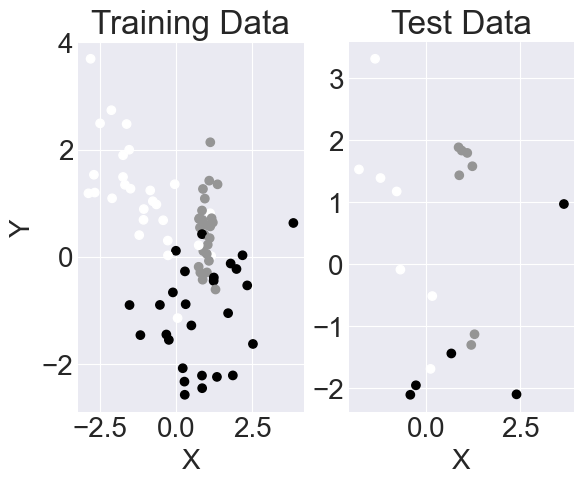

In [69]:
train = pd.read_csv("data/train.csv", delimiter=",", header=1)
test = pd.read_csv("data/test.csv",  delimiter=",", header=1)

train = train.to_numpy()
test = test.to_numpy()

train_y = train[:,2]
test_y = test[:,2]

train_data = train[:,:2]
test_data = test[:,:2]

plt.subplots(1,2)
plt.subplot(1,2,1)
plt.scatter(train_data[:,0],train_data[:,1],c=train_y)
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,2,2)
plt.scatter(test_data[:,0],test_data[:,1],c=test_y)
plt.title("Test Data")
plt.xlabel("X");

Best KNN Accuracy is with k = 1: 
0.84
KNN Confusion Matrix: 
 [[7. 0. 0.]
 [7. 0. 0.]
 [5. 0. 0.]]


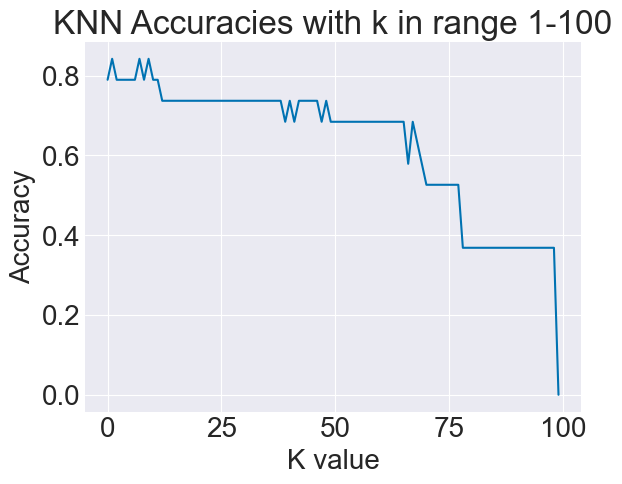

In [70]:
knn_n_classes = 3
knn_analysis = KNN(num_classes=knn_n_classes)

accuracy = np.zeros((100,))

for k in range(99):
    knn_analysis.train(train_data, train_y)
    predict_y = knn_analysis.predict(test_data,k+1)
    acc_knn = knn_analysis.accuracy(y=test_y, y_pred=predict_y)
    accuracy[k] = acc_knn

plt.plot(np.arange(0,100,step=1),accuracy)
plt.title("KNN Accuracies with k in range 1-100")
plt.xlabel("K value")
plt.ylabel("Accuracy")
print(f"Best KNN Accuracy is with k = {np.argmax(accuracy)}: \n{np.max(accuracy):.2f}")

conf_matrix_knn = knn_analysis.confusion_matrix(test_y,predict_y)
print("KNN Confusion Matrix: \n",conf_matrix_knn)

In [71]:
nb_n_classes = 3
nb_analysis = NaiveBayes(num_classes=nb_n_classes)
conf_matrix = Classifier(num_classes=nb_n_classes)

nb_analysis.train(train_data,train_y)
y_pred = nb_analysis.predict(test_data) 
nb_accuracy = nb_analysis.accuracy(y=test_y,y_pred=y_pred)
print(f"Naive Bayes Accuracy: \n{nb_accuracy:.2f}")

conf_matrix_nb = conf_matrix.confusion_matrix(test_y, y_pred)
print("Naive Bayes Confusion Matrix: \n",conf_matrix_nb);

Naive Bayes Accuracy: 
0.37
Naive Bayes Confusion Matrix: 
 [[7. 0. 0.]
 [7. 0. 0.]
 [5. 0. 0.]]


/Users/mayakalenak/Desktop/project6/naive_bayes.py:37: RuntimeWarning: invalid value encountered in log
  return np.log(self.likelihoods)


datasets:

https://www.kaggle.com/datasets/isilguler/knn-ds/data

https://www.kaggle.com/datasets/pokekarat/knn-toy/code

I used sample datasets from kaggle to test the KNN and Naive Bayes algorithms. I tested both to see which values of k produce valid or not valid accuracies with 3 classes to analyze the accuracies between KNN and Naive Bayes with a confusion matrix. In the first dataset, KNN had an accuracy of 84% and Naive Bayes had an accuracy of 73%. They both correctly classified around the same number of points into class 2 and misclassified more points in class 1 than class 2. However, there was only one point correctly classified into class 1 in Naive Bayes producing a lower accuracy. In the second dataset, both KNN and Naive Bayes produced the same confusion matrices, but there was a much higher accuracy with KNN than with Naive Bayes. The differences between the accuracies in and between the datasets may be due to the density of the data since the first dataset took 10 k neighbors to produce the same accuracy as the second dataset with k=1 neighbor.

### 1. Better text preprocessing

- If you look at the top words extracted from the email dataset, many of them are common "stop words" (e.g. a, the, to, etc.) that do not carry much meaning when it comes to differentiating between spam vs. non-spam email. Improve your preprocessing pipeline by building your top words without stop words. Analyze performance differences.

### 2. Feature size

- Explore how the number of selected features for the email dataset influences accuracy and runtime performance.

In [72]:
import email_preprocessor as pre
word_freq, num_emails = pre.count_words(email_path='data/enron/')

In [73]:
np.random.seed(0)
top_50_words, top_counts = pre.find_top_words(word_freq,50)
features, y = pre.make_feature_vectors(top_50_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [74]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 50 feature: ",nb_accuracy);

Naive Bayes accuracy with 50 feature:  0.7731800766283525


/Users/mayakalenak/Desktop/project6/naive_bayes.py:33: RuntimeWarning: divide by zero encountered in log
  return np.log(self.prior)


In [75]:
np.random.seed(0)
top_100_words, top_counts = pre.find_top_words(word_freq,100)
features, y = pre.make_feature_vectors(top_100_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [76]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 100 feature: ",nb_accuracy);

Naive Bayes accuracy with 100 feature:  0.835095785440613


In [77]:
np.random.seed(0)
top_200_words, top_counts = pre.find_top_words(word_freq,200)
features, y = pre.make_feature_vectors(top_200_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [78]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 200 feature: ",nb_accuracy);

Naive Bayes accuracy with 200 feature:  0.8954789272030651


In [79]:
np.random.seed(0)
top_400_words, top_counts = pre.find_top_words(word_freq,400)
features, y = pre.make_feature_vectors(top_400_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)


In [80]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 400 feature: ",nb_accuracy);

Naive Bayes accuracy with 400 feature:  0.933639846743295


In [81]:
np.random.seed(0)
top_800_words, top_counts = pre.find_top_words(word_freq,800)
features, y = pre.make_feature_vectors(top_800_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [82]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 800 feature: ",nb_accuracy);

Naive Bayes accuracy with 800 feature:  0.9480459770114943


In [83]:
np.random.seed(0)
top_1600_words, top_counts = pre.find_top_words(word_freq,1600)
features, y = pre.make_feature_vectors(top_1600_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [84]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 1600 feature: ",nb_accuracy);

Naive Bayes accuracy with 1600 feature:  0.963984674329502


In [85]:
np.random.seed(0)
top_3200_words, top_counts = pre.find_top_words(word_freq,3200)
features, y = pre.make_feature_vectors(top_3200_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [86]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 3200 feature: ",nb_accuracy);

Naive Bayes accuracy with 3200 feature:  0.969808429118774


In [87]:
np.random.seed(0)
top_6400_words, top_counts = pre.find_top_words(word_freq,6400)
features, y = pre.make_feature_vectors(top_6400_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [88]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 6400 feature: ",nb_accuracy);

Naive Bayes accuracy with 6400 feature:  0.9742528735632184


In [89]:
np.random.seed(0)
top_12800_words, top_counts = pre.find_top_words(word_freq,12800)
features, y = pre.make_feature_vectors(top_12800_words, num_emails)
x_train, y_train, inds_train, x_test, y_test, inds_test = pre.make_train_test_sets(features, y)

In [90]:
num_classes = 4
nb_analysis = NaiveBayes(num_classes=num_classes)
nb_analysis.train(x_train,y_train)
y_pred = nb_analysis.predict(x_test) 
nb_accuracy = nb_analysis.accuracy(y=y_test,y_pred=y_pred)
print("Naive Bayes accuracy with 12800 feature: ",nb_accuracy);

Naive Bayes accuracy with 12800 feature:  0.9799233716475095


I used the enron email data to find how the top features affects the accuracy and runtime of the Naive Bayes algorithm. I exponentially increased the num features from 50-12800 and found the algorithm took too long (didn't stop) at num features higher than this. The accuracy started at 77% at 50 top features, then the accuracy started to plateau around 1600 features, increasing to 97% at 12800 top features. Also, each increase in number of features took approximately 1.5 times longer that the last run. Therefore, the tradeoff between a higher accuracy over 1600 top features and runtime is almost trivial since there is a much higher runtime as num features increases and a small increase in accuracy. However, the tradeoff between the accuracy and the runtime is best with 1600 top features since the accuracy significantly increases from 50 top features and the runtime is around one minute which is significantly shorter than 12800 top features.

### 3. Distance metrics
- Compare KNN performance with the $L^2$ and $L^1$ distance metrics

### 4. K-Fold Cross-Validation

- Research this technique and apply it to data and your KNN and/or Naive Bayes classifiers.

*For credit: You need to provide exact links to resources you relied on.*

### 5. Email error analysis

- Dive deeper into the properties of the emails that were misclassified (FP and/or FN) by Naive Bayes or KNN. What is their word composition? How many words were skipped because they were not in the training set? What could plausibly account for the misclassifications?

### 6. Investigate the misclassification errors

Numbers are nice, but they may not the best for developing your intuition. Sometimes, you want to see what an misclassification *actually looks like* to help you improve your algorithm. Retrieve the actual text of some example emails of false positive and false negative misclassifications to see if helps you understand why the misclassification occurred. Here is an example workflow:

- Decide on how many FP and FN emails you would like to retrieve. Find the indices of this many false positive and false negative misclassification. Remember to use your `test_inds` array to look up the index of the emails BEFORE shuffling happened.
- Implement the function `retrieve_emails` in `email_preprocessor.py` to return the string of the raw email at the error indices.
- Call your function to print out the emails that produced misclassifications.

Do the FP and FN emails make sense? Why? Do the emails have properties in common? Can you quantify and interpret them?